In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import seaborn as sns
from matplotlib import cm
from matplotlib.dates import MinuteLocator, DateFormatter, DayLocator
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, NullFormatter)


from datetime import timedelta

# 

import datetime as dt
from datetime import datetime

sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams["figure.figsize"] = (11,4)

# pd.set_option('notebook_repr_html',True)
%matplotlib inline
pd.set_option("display.max_rows",10)

## Import Data

In [2]:

def get_data(filename):
    rows = []
    with open(filename) as f_input:
        reader = csv.reader(f_input)
        for row in reader:
            if row:
                if row[0] == '300':
                    rows.append(row[1:50])
                    
    df = pd.DataFrame(rows)
    df.set_index(pd.to_datetime(df[0], format="%Y%m%d"), inplace=True)

    df.drop(columns=[0], inplace=True)
    df.index.set_names('DATE', inplace=True)
    df = df.astype('float')
    return df

In [4]:
def get_data(filename):
    
#     dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')


    df = pd.read_csv(filename, parse_dates=[0], dayfirst=True)#, date_parser=dateparse)
    df.datetime_utc = pd.to_datetime(df['datetime_utc'], errors='coerce', format='%Y-%m-%d %H:M')
    df['datetime'] = df.datetime_utc + timedelta(hours=10)
    df.drop(['datetime_utc', 'datetime_local','is_peak', 'cost_dollars'], axis=1, inplace=True, errors='ignore')
    df = df.set_index('datetime')
#     freq = pd.infer_freq(df.index)
#     df = df.asfreq(freq)
    return df

## Get Powerpal Data


In [17]:
%%time
files = ['powerpal_data_00016633_20210415_20210714.csv',
         'powerpal_data_00016633_20210608_20210907.csv',
         'powerpal_data_00016633_20210906_20211206.csv',
         'powerpal_data_00016633_20211022_20220120.csv',
         'powerpal_data_00016633_20211221_20220320.csv',
         'powerpal_data_00016633_20220302_20220531.csv',
         'powerpal_data_00016633_20220530_20220828.csv',
         'powerpal_data_00016633_20220827_20221125.csv',
         'powerpal_data_00016633_20221124_20230201.csv',
         'powerpal_data_00016633_20230201_20230502.csv',
         'powerpal_data_00016633_20230501_20230730.csv',
         'powerpal_data_00016633_20230801_20230826.csv',
         'powerpal_data_00016633_20230806_20231104.csv'
        ]

df_list = []
for filename in files:
    df_list.append(get_data(filename))

df = df_list[0]
for dfc in df_list[1:]:
    df = df.combine_first(dfc)
# df = pd.concat(df_list, ignore_index=False).sort_index()
df

CPU times: total: 33.3 s
Wall time: 33.3 s


watt_hours
datetime                       
2021-04-15 14:36:00        1.00
2021-04-15 14:37:00        8.00
2021-04-15 14:38:00        8.00
2021-04-15 14:39:00        6.00
2021-04-15 14:40:00        6.00
...                         ...
2023-09-01 19:19:00       10.00
2023-09-01 19:20:00        8.75
2023-09-01 19:21:00       10.00
2023-09-01 19:22:00        8.75
2023-09-01 19:23:00       10.00

[1115079 rows x 1 columns]

In [7]:
# df_list[-1]
# df = get_data(filename)
# df = pd.read_csv(filename, parse_dates=[0], dayfirst=True)
# df.datetime_utc#.dt.month.to_clipboard()
# pd.infer_freq(df.index)

In [21]:
start = df.index[0]
end = df.index[-1]
print("Start date: {:%Y-%m-%d %H:%M}".format(start))
print("  End date: {:%Y-%m-%d %H:%M}".format(end))
print(" Difference {:}".format(str(pd.Timedelta(end - start))))
print(pd.Timedelta(end - start).total_seconds()/60)
print(len(df))
print(end - start)

Start date: 2021-04-15 14:36
  End date: 2023-09-01 19:23
 Difference 869 days 04:47:00
1251647.0
1115079
869 days 04:47:00


# Daily

watt_hours
datetime              
2021-04-15     4568.00
2021-04-16    10540.00
2021-04-17     8509.00
2021-04-18    11801.00
2021-04-19     9744.00
...                ...
2023-08-28     7753.75
2023-08-29    11102.50
2023-08-30    15020.00
2023-08-31    12800.00
2023-09-01    12686.25

[870 rows x 1 columns]

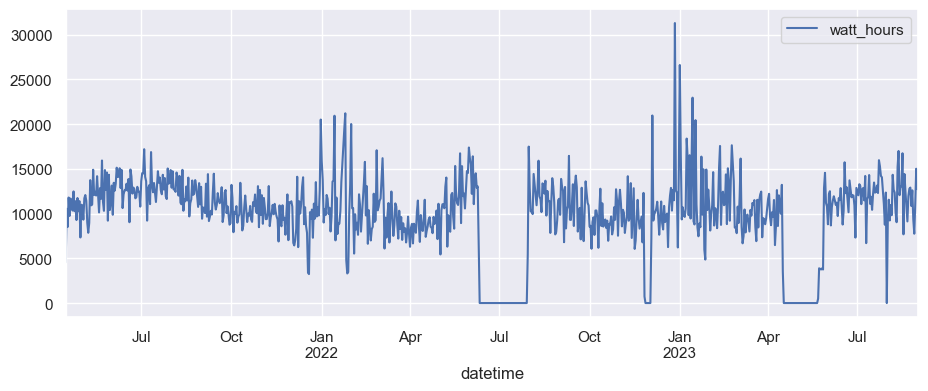

In [23]:
df_daily = df.groupby(pd.Grouper(freq='D')).sum()
df_daily.plot()
df_daily

In [24]:
df_daily.mean()
df_daily.max()

watt_hours    31312.5
dtype: float64

In [25]:
len(df_daily)

870

In [26]:
df_daily['2023-08-10':'2023-08-23'].sum()/1000

watt_hours    175.3675
dtype: float64

In [27]:
def repeat_values(series):
    x = series.index
    freq = x.freq
    minutes = freq.n
    x = x.union(x + freq)
    x= x.values
    x = x.repeat(2)[1:-1]
    
    y = series.values
#     y = y*(60/minutes)
    y = y.repeat(2)
    return x, y

# x, y = repeat_values(df.loc['2021-04-18'].watt_hours)


    
    

In [28]:
# cmap = plt.cm.Greys
cmap = plt.cm.jet
cmap = plt.cm.get_cmap('Blues')
cmaplist = [cmap(i) for i in range(cmap.N)]
# # cmap.N
cmap2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

C:\Users\Shaun\AppData\Local\Temp\ipykernel_17200\2341935651.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues')


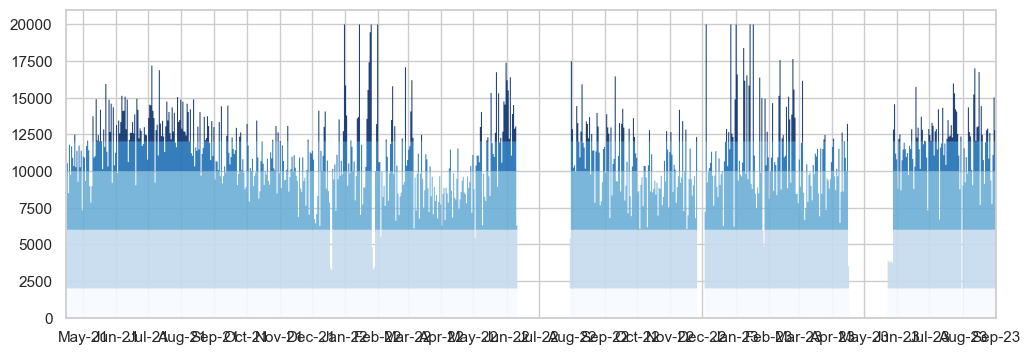

In [29]:
sns.set_style('darkgrid')
sns.set_style('whitegrid')
test = df_daily[:-1]
x = test.index
y = test.values
fig ,ax = plt.subplots(figsize=(12,4))
# ax.scatter(test.index, test.values)
x, y = repeat_values(test)
# ax.plot(x, y, lw=1, color = 'k')
ax.set_xlim([x[0], x[-1]])

# ax.fill_between(x, 0, np.minimum(y, 10000), alpha=0.4)
# ax.fill_between(x, np.minimum(y, 10000), np.minimum(y, 11000), alpha=0.4)


bands = [0, 2000, 6000, 10000, 12000, 20000]
N = len(bands)
# bands = np.linspace(0, 20000, 5)
norm = mpl.colors.Normalize(0,N-2)
# norm = mpl.colors.BoundaryNorm(range(len(bands)), cmap.N)
band0 = bands[0]
i = 0
for band in bands[1:]:
    ax.fill_between(x, np.minimum(y, band0), np.minimum(y, band), alpha=0.9, edgecolor = "none", facecolor=cmap(norm(i)))
    band0 = band
    i = i +1
    
# ax.grid('off')
ax.set_ylim(bottom=0)
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))

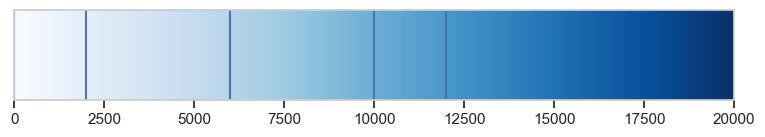

In [17]:
a = np.array([[0,20000]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap=cmap)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(
#     cm.ScalarMappable(norm=norm, cmap=cmaplist),
    orientation="horizontal", cax=cax)
for band in bands:
    plt.axvline(band)

In [18]:
N = len(bands)
print(N)

6


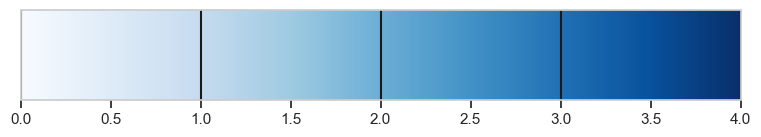

In [19]:
a = np.array([[0,N-2]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap=cmap)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(
#     cm.ScalarMappable(norm=norm, cmap=cmaplist),
    orientation="horizontal", cax=cax)
for i in range(N):
    plt.axvline(i, color='k')

In [22]:
norm = mpl.colors.BoundaryNorm(range(5), cmap.N)
norm

In [23]:
cm.ScalarMappable(norm=norm, cmap=cmap)

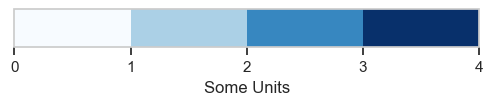

In [24]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

# cmap = mpl.cm.cool
# norm = mpl.colors.Normalize(vmin=5, vmax=10)

fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap)
             , cax=ax
             , orientation='horizontal'
             , label='Some Units')

In [25]:
mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

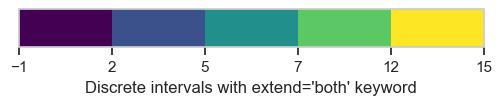

In [26]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.viridis
bounds = [-1, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")

In [27]:
np.maximum(y, 10000)

array([10000.  , 10000.  , 10540.  , ..., 12685.  , 10946.25, 10946.25])

## plotly

In [30]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()

In [31]:
df_daily.reset_index()

datetime  watt_hours
0   2021-04-15     4568.00
1   2021-04-16    10540.00
2   2021-04-17     8509.00
3   2021-04-18    11801.00
4   2021-04-19     9744.00
..         ...         ...
865 2023-08-28     7753.75
866 2023-08-29    11102.50
867 2023-08-30    15020.00
868 2023-08-31    12800.00
869 2023-09-01    12686.25

[870 rows x 2 columns]

In [32]:
fig = px.bar(df_daily.reset_index(), x='datetime', y='watt_hours',
              hover_data={"datetime": "|%d-%m-%Y"},
              title='custom tick labels with ticklabelmode="period"')
fig.update_xaxes(
    dtick="M1",
#     tickformat="%b\n%Y",
    
    tickformatstops = [
        dict(dtickrange=[None, 1000], value="%b\n%Y"),
        dict(dtickrange=[1000, 60000], value="%H:%M:%S s"),
        dict(dtickrange=[60000, 3600000], value="%H:%M m"),
        dict(dtickrange=[3600000, 86400000], value="%H:%M h"),
        dict(dtickrange=[86400000, 604800000], value="%d %b d"),
        dict(dtickrange=[604800000, "M1"], value="%b '%y w"),
        dict(dtickrange=["M1", "M12"], value="%b '%y M"),
        dict(dtickrange=["M12", None], value="%Y Y")
    ],
    
    ticklabelmode="period",

    ticks="outside",
    minor=dict(
        ticks="outside",
        tickwidth=2,
        ticklen=30,
        dtick="M12")
    )
fig.show()

## Aggregate to 30 Minute level

In [33]:
df_30min = df.resample('30min').sum()
df_30min

watt_hours
datetime                       
2021-04-15 14:30:00      280.00
2021-04-15 15:00:00      186.00
2021-04-15 15:30:00      183.00
2021-04-15 16:00:00      188.00
2021-04-15 16:30:00      210.00
...                         ...
2023-09-01 17:00:00     1566.25
2023-09-01 17:30:00     1370.00
2023-09-01 18:00:00      316.25
2023-09-01 18:30:00      350.00
2023-09-01 19:00:00      208.75

[41722 rows x 1 columns]

In [111]:
df_30min.index

DatetimeIndex(['2021-04-15 14:30:00', '2021-04-15 15:00:00',
               '2021-04-15 15:30:00', '2021-04-15 16:00:00',
               '2021-04-15 16:30:00', '2021-04-15 17:00:00',
               '2021-04-15 17:30:00', '2021-04-15 18:00:00',
               '2021-04-15 18:30:00', '2021-04-15 19:00:00',
               ...
               '2023-09-01 14:30:00', '2023-09-01 15:00:00',
               '2023-09-01 15:30:00', '2023-09-01 16:00:00',
               '2023-09-01 16:30:00', '2023-09-01 17:00:00',
               '2023-09-01 17:30:00', '2023-09-01 18:00:00',
               '2023-09-01 18:30:00', '2023-09-01 19:00:00'],
              dtype='datetime64[ns]', name='datetime', length=41722, freq='30T')

In [137]:
a = pd.Timestamp('2021-04-19 00:00')
a.minute

def time_to_period(x):
    return int(((2*(x.hour + x.minute/60)-1) % 48 )+ 1)


time_to_period(a)

def time_to_date(x):
    return pd.to_datetime(x.date)

def time_to_periodstring(x):
    return 'Period_{:02d}'.format(time_to_period(x))

time_to_periodstring(a)

'Period_48'

In [138]:
def to_columnwise(df):
    df['Period'] = df.index.map(time_to_period)
    df['Settlement_Date'] = df.index.map(time_to_date)
    df = df.reset_index()
    df = df.set_index(['Settlement_Date','Period'])
    df = df.watt_hours.unstack()
    df.columns = ['Period_{:02d}'.format(i+1) for i in range(48)]
    return df

def time_to_5period(x):
    return int(((12*(x.hour + x.minute/60)-1) % 288 )+ 1)

def to_columnwise_5min(df):
    df['Period'] = df.index.map(time_to_5period)
    df['Settlement_Date'] = df.index.map(time_to_date)
    df = df.reset_index()
    df = df.set_index(['Settlement_Date','Period'])
    df = df.watt_hours.unstack()
    df.columns = ['Period_{:002d}'.format(i+1) for i in range(288)]
    return df

In [139]:
df_30min_daily = to_columnwise(df_30min)
df_30min_daily

Period_01  Period_02  Period_03  Period_04  Period_05  \
Settlement_Date                                                          
2021-04-15             NaN        NaN        NaN        NaN        NaN   
2021-04-16           98.00      98.00      87.00      87.00      97.00   
2021-04-17           96.00      92.00      83.00      89.00      98.00   
2021-04-18           96.00      94.00      83.00      86.00      96.00   
2021-04-19           96.00      86.00      85.00      95.00      95.00   
...                    ...        ...        ...        ...        ...   
2023-08-28           91.25      76.25      80.00      88.75      88.75   
2023-08-29           78.75      83.75      92.50      87.50      76.25   
2023-08-30           93.75      90.00      82.50      85.00      93.75   
2023-08-31          145.00     146.25     153.75     148.75     131.25   
2023-09-01          145.00     138.75     148.75     148.75     222.50   

                 Period_06  Period_07  Period_08  Period_09  Period_10  ...  \
Settlement_Date                                                         ...   
2021-04-15             NaN        NaN        NaN        NaN        NaN  ...   
2021-04-16           96.00      93.00      83.00      90.00      97.00  ...   
2021-04-17           95.00      84.00      82.00      93.00      92.00  ...   
2021-04-18           97.00      90.00      82.00      90.00      95.00  ...   
2021-04-19           91.00      82.00      86.00      96.00      95.00  ...   
...                    ...        ...        ...        ...        ...  ...   
2023-08-28           75.00      80.00      87.50      85.00      71.25  ...   
2023-08-29           88.75      91.25      81.25      76.25      88.75  ...   
2023-08-30           92.50      82.50      80.00      92.50      92.50  ...   
2023-08-31          143.75     142.50     128.75     132.50     140.00  ...   
2023-09-01          165.00     146.25     148.75     133.75     126.25  ...   

                 Period_39  Period_40  Period_41  Period_42  Period_43  \
Settlement_Date                                                          
2021-04-15          179.00     170.00      170.0     161.00     161.00   
2021-04-16          172.00     181.00      173.0     163.00     463.00   
2021-04-17          278.00     263.00      142.0     137.00     214.00   
2021-04-18          241.00     175.00      172.0     176.00     148.00   
2021-04-19          188.00     270.00      265.0     134.00     131.00   
...                    ...        ...        ...        ...        ...   
2023-08-28           95.00     306.25      432.5     177.50     121.25   
2023-08-29          366.25     613.75      340.0     237.50     181.25   
2023-08-30          297.50     626.25      522.5     251.25     518.75   
2023-08-31          492.50     266.25      247.5     247.50     203.75   
2023-09-01             NaN        NaN        NaN        NaN        NaN   

                 Period_44  Period_45  Period_46  Period_47  Period_48  
Settlement_Date                                                         
2021-04-15          129.00     112.00     100.00      87.00        NaN  
2021-04-16          399.00     122.00     383.00     176.00      91.00  
2021-04-17          127.00     114.00      88.00      85.00      90.00  
2021-04-18          112.00      88.00      87.00      93.00      95.00  
2021-04-19          123.00     106.00     100.00      90.00      96.00  
...                    ...        ...        ...        ...        ...  
2023-08-28          103.75      83.75      80.00      95.00      92.50  
2023-08-29          113.75      97.50      86.25      82.50      91.25  
2023-08-30          308.75     163.75     155.00     161.25      92.50  
2023-08-31          188.75     155.00     148.75     157.50     158.75  
2023-09-01             NaN        NaN        NaN        NaN     156.25  

[870 rows x 48 columns]

In [37]:
def period_to_time(period):
    return dt.time(((period+1) //2) % 24,((period + 1) % 2)*30).strftime("%H:%M")

def common_timeseriesplot(ax, plt_kwargs={}):
    
    ts = np.arange(1, 48, step=2)
#     ts = np.arange(11, 288, step=12)
    tl = [period_to_time(t) for t in ts]
#     ax.axvspan(0,83, facecolor='k', alpha=0.1)
#     ax.axvspan(275,287, facecolor='k', alpha=0.1)

    ax.set_xlim([-1, 47]);
#     ax.set_ylim(bottom=0)
    ax.set_xticks(ts);
    ax.set_xticklabels(tl, rotation = 45, ha='right');

#     ax.xaxis.set_minor_locator(MultipleLocator(6))
#     ax.xaxis.set_minor_formatter(ticker.NullFormatter())
#     ax.grid(b=True, which='minor', color='w', linewidth=0.5)
    
    return ax

In [38]:
def period_to_5time(period):
    return dt.time(((period+1) //12) % 24,((period + 1) % 12)*30).strftime("%H:%M")

def common_5timeseriesplot(ax, plt_kwargs={}):
    
#     ts = np.arange(1, 48, step=2)
    ts = np.arange(11, 288, step=12)
    tl = [period_to_5time(t) for t in ts]
#     ax.axvspan(0,83, facecolor='k', alpha=0.1)
#     ax.axvspan(275,287, facecolor='k', alpha=0.1)

    ax.set_xlim([-1, 287]);
#     ax.set_ylim(bottom=0)
    ax.set_xticks(ts);
    ax.set_xticklabels(tl, rotation = 45, ha='right');

#     ax.xaxis.set_minor_locator(MultipleLocator(6))
#     ax.xaxis.set_minor_formatter(ticker.NullFormatter())
#     ax.grid(b=True, which='minor', color='w', linewidth=0.5)
    
    return ax

<Axes: >

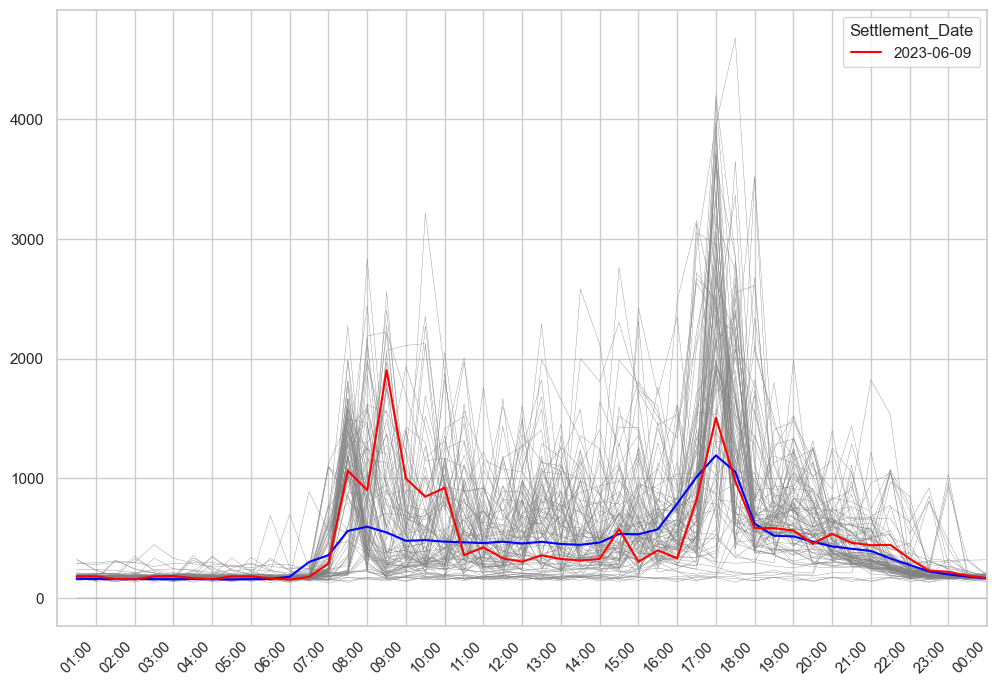

In [40]:
sns.set_style("whitegrid")
n = 100
ax = (2*df_30min_daily[-n:]).T.plot(figsize=(12,8), legend=False, color='grey', lw=0.25)
ax =(2*df_30min_daily[:]).mean().plot(color='blue')
ax = (2*df_30min_daily[-n:]).sample(1).T.plot(ax=ax, color='red')
common_timeseriesplot(ax)

In [41]:
df_5min = df.resample('5min').sum()
df_5min

watt_hours
datetime                       
2021-04-15 14:35:00       23.00
2021-04-15 14:40:00       29.00
2021-04-15 14:45:00      167.00
2021-04-15 14:50:00       34.00
2021-04-15 14:55:00       27.00
...                         ...
2023-09-01 19:00:00       43.75
2023-09-01 19:05:00       40.00
2023-09-01 19:10:00       42.50
2023-09-01 19:15:00       45.00
2023-09-01 19:20:00       37.50

[250330 rows x 1 columns]

In [42]:
df_5min.index.map(time_to_5period)
df_5min_daily = to_columnwise_5min(df_5min)
df_5min_daily

Period_01  Period_02  Period_03  Period_04  Period_05  \
Settlement_Date                                                          
2021-04-15             NaN        NaN        NaN        NaN        NaN   
2021-04-16           19.00      15.00      11.00      13.00      13.00   
2021-04-17           19.00      17.00      11.00      13.00      11.00   
2021-04-18           20.00      19.00      13.00      13.00      11.00   
2021-04-19           16.00      19.00      20.00      17.00      11.00   
...                    ...        ...        ...        ...        ...   
2023-08-28           17.50      18.75      18.75      11.25      12.50   
2023-08-29           11.25      15.00      17.50      18.75      17.50   
2023-08-30           17.50      18.75      15.00      11.25      11.25   
2023-08-31           22.50      25.00      30.00      28.75      28.75   
2023-09-01           22.50      28.75      28.75      28.75      25.00   

                 Period_06  Period_07  Period_08  Period_09  Period_10  ...  \
Settlement_Date                                                         ...   
2021-04-15             NaN        NaN        NaN        NaN        NaN  ...   
2021-04-16           16.00      19.00      19.00      18.00      13.00  ...   
2021-04-17           13.00      18.00      19.00      19.00      14.00  ...   
2021-04-18           13.00      16.00      20.00      19.00      15.00  ...   
2021-04-19           13.00      11.00      14.00      19.00      19.00  ...   
...                    ...        ...        ...        ...        ...  ...   
2023-08-28           11.25      11.25      13.75      18.75      18.75  ...   
2023-08-29           13.75      11.25      11.25      11.25      13.75  ...   
2023-08-30           11.25      16.25      17.50      18.75      18.75  ...   
2023-08-31           22.50      22.50      22.50      22.50      25.00  ...   
2023-09-01           22.50      21.25      22.50      21.25      28.75  ...   

                 Period_279  Period_280  Period_281  Period_282  Period_283  \
Settlement_Date                                                               
2021-04-15            20.00       19.00       20.00       15.00       13.00   
2021-04-16            19.00      121.00      195.00      110.00       13.00   
2021-04-17            13.00       18.00       19.00       19.00       17.00   
2021-04-18            11.00       13.00       14.00       19.00       19.00   
2021-04-19            19.00       20.00       16.00       11.00       13.00   
...                     ...         ...         ...         ...         ...   
2023-08-28            11.25       11.25       10.00       17.50       18.75   
2023-08-29            12.50       16.25       18.75       18.75       17.50   
2023-08-30            23.75       23.75       25.00       28.75       30.00   
2023-08-31            22.50       22.50       22.50       28.75       28.75   
2023-09-01              NaN         NaN         NaN         NaN         NaN   

                 Period_284  Period_285  Period_286  Period_287  Period_288  
Settlement_Date                                                              
2021-04-15            13.00       13.00       14.00       19.00         NaN  
2021-04-16            11.00       13.00       11.00       18.00       20.00  
2021-04-17            13.00       11.00       13.00       12.00       19.00  
2021-04-18            19.00       12.00       13.00       11.00       19.00  
2021-04-19            13.00       15.00       19.00       19.00       13.00  
...                     ...         ...         ...         ...         ...  
2023-08-28            17.50       18.75       12.50       10.00       13.75  
2023-08-29            11.25       11.25       11.25       12.50       11.25  
2023-08-30            31.25       26.25       22.50       22.50       18.75  
2023-08-31            28.75       27.50       22.50       21.25       23.75  
2023-09-01              NaN         NaN         NaN         Na

In [43]:
idx = (12*df_5min_daily[-n:]).sample(1).index
print(idx)
idx.strftime('%a %d %b')

Index([2023-08-26], dtype='object', name='Settlement_Date')


AttributeError: 'Index' object has no attribute 'strftime'

(0.0, 4561.5)

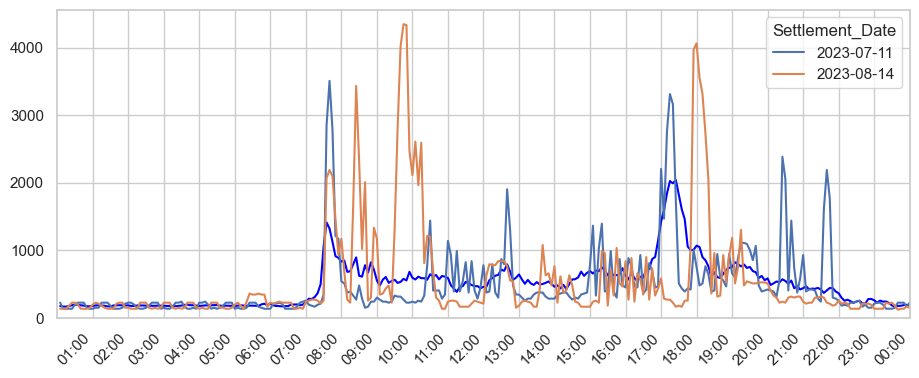

In [44]:
n = 60
# ax = (12*df_5min_daily[-n:]).T.plot(figsize=(12,8), legend=False, color='grey', lw=0.25)
ax = (12*df_5min_daily[-n:]).mean().plot(color='blue')
sample = (12*df_5min_daily[-n:]).sample(2)
ax = (12*df_5min_daily[-n:]).sample(2).T.plot(ax=ax)
common_5timeseriesplot(ax)
ax.set_ylim(bottom=0)

In [45]:
df['2022-03-19']#['watt_hours'].plot()

C:\Users\Shaun\AppData\Local\Temp\ipykernel_17200\2906221475.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



watt_hours
datetime                       
2022-03-19 00:00:00         3.0
2022-03-19 00:01:00         3.0
2022-03-19 00:02:00         3.0
2022-03-19 00:03:00         3.0
2022-03-19 00:04:00         3.0
...                         ...
2022-03-19 23:55:00         5.0
2022-03-19 23:56:00         5.0
2022-03-19 23:57:00         5.0
2022-03-19 23:58:00         5.0
2022-03-19 23:59:00         3.0

[1439 rows x 1 columns]

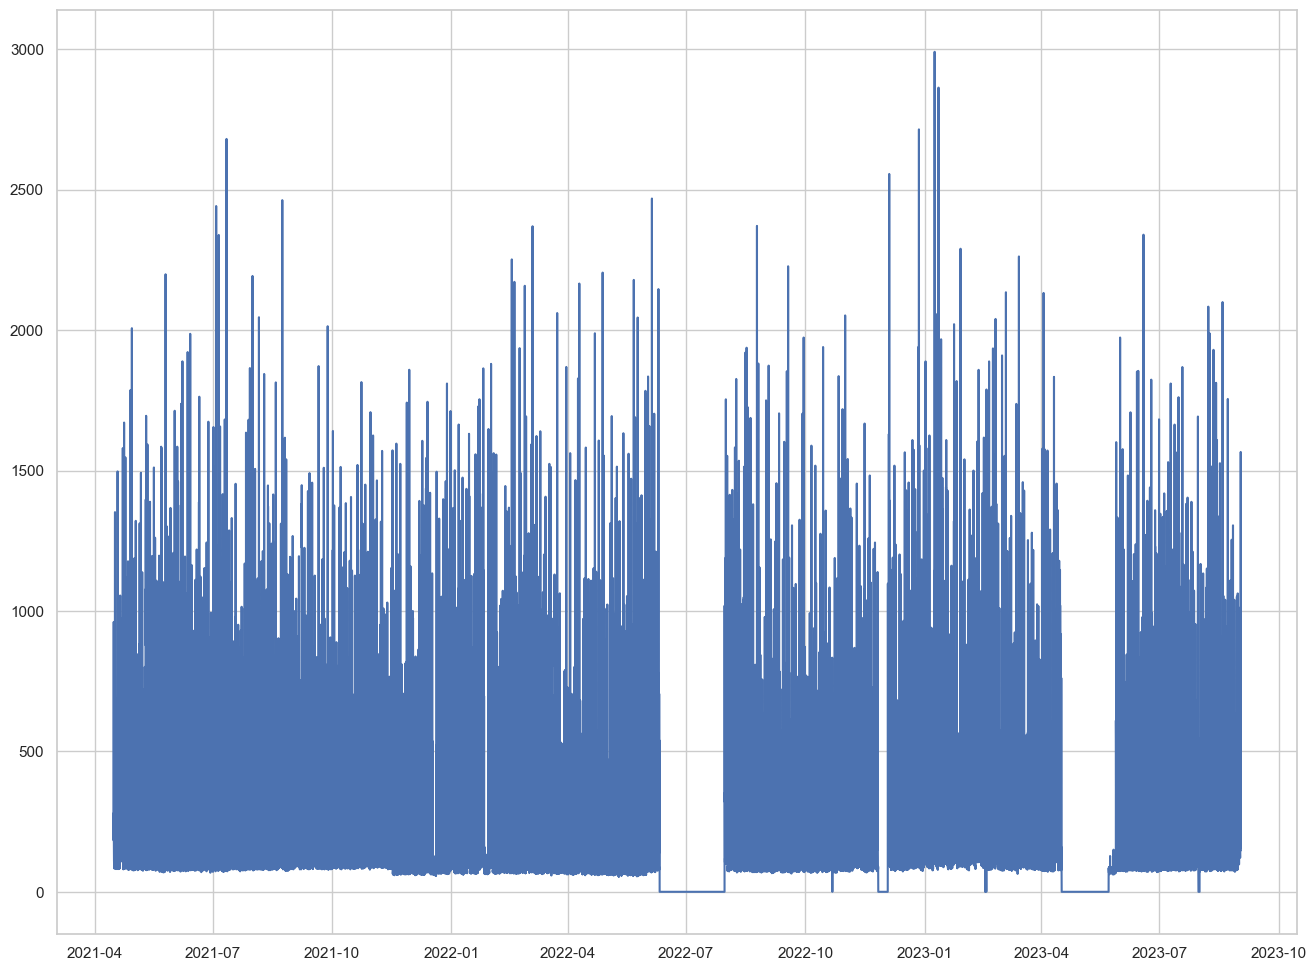

In [46]:
fig, ax = plt.subplots(figsize=(16,12))

x = df_30min.index
y = df_30min['watt_hours']

ax.plot(x,y)

In [49]:
x = df_30min.loc['2021-05-01':].watt_hours.index
freq = x.freq
minutes = freq.n
len(x.union(x + freq))

40984

In [55]:
colors = ([(0.04, 0.015, 0.02, 1.0)] * 6 + [(0.8, 0.5, 0.2, 1.0)] * 6) * 16
len(colors)

192

In [58]:
df

watt_hours
datetime                       
2021-04-15 14:36:00        1.00
2021-04-15 14:37:00        8.00
2021-04-15 14:38:00        8.00
2021-04-15 14:39:00        6.00
2021-04-15 14:40:00        6.00
...                         ...
2023-09-01 19:19:00       10.00
2023-09-01 19:20:00        8.75
2023-09-01 19:21:00       10.00
2023-09-01 19:22:00        8.75
2023-09-01 19:23:00       10.00

[1115079 rows x 1 columns]

In [61]:
def plot_time(startdate, enddate):
    fig, ax = plt.subplots(figsize=(16,10))

    y = df_30min.loc[str(startdate):str(enddate)].watt_hours

    x30, y30 = repeat_values(df_30min.loc[str(startdate):str(enddate)].watt_hours)
#     ax.plot(x30,y30, color='k', linewidth = 1)
#     ax.fill_between(x30, y30, alpha=0.4, facecolor = 'grey')
#     print(len(y))
#     ax.bar(y.index, 2*y, width=pd.Timedelta(minutes=30)
# #            , edgecolor="none"
#            , align='edge'
#            , facecolor = "none"
# #            , color=colors
#            , alpha=0.75)

    y = df_5min.loc[str(startdate):str(enddate)].watt_hours
    x5, y5 = repeat_values(df_5min.loc[str(startdate):str(enddate)].watt_hours)
#     ax.plot(x5, y5, color='b', linewidth = 1)
    print(len(y), len(colors))
    ax.bar(y.index, 12*y, width=pd.Timedelta(minutes=5)
           , edgecolor="none"
           , align='edge'
           , color=colors
#            , facecolor="grey"
           , alpha=0.75)
#     ax.fill_between(x5, y5, alpha=0.4, facecolor = 'b')

#     x1, y1 = repeat_values(df.loc[str(startdate):str(enddate)].watt_hours)
    # ax.plot(x1, y1, color='r', linewidth = 1)



#     x, y = repeat_values(df.loc['2021-05-01':].watt_hours)
    # ax.plot(x,y, linewidth = 1, color='green')
    # ax.fill_between(x, y, alpha=0.4, facecolor = 'red')

    # ax.fill_between(x, y, y>y30, alpha=0.4, facecolor = 'grey')


    # ax.set_xticks(ts)
    # ax.set_xticklabels(tl)

    majorLoc = MinuteLocator(byminute=np.arange(0,60,30))
    minorLoc = MinuteLocator(byminute=np.arange(0,60,5))
    ax.xaxis.set_major_locator(majorLoc)
    ax.xaxis.set_minor_locator(minorLoc)

    # ax.xaxis.set_major_locator(MultipleLocator(6))
    # ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_minor_formatter(NullFormatter())

    # ax.yaxis.set_minor_locator(MultipleLocator(60))

    # ax.yaxis.set_minor_formatter(NullFormatter())

    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
    # ax.xaxis.set_minor_formatter(DateFormatter('%H:%M'))
    ax.grid(visible=True, which='minor', color='w', linewidth=0.5)

    # period_to_time(period, interval=30)

    ax.set_ylim(bottom=0)
    # ax.autoscale(axis='x', tight=True)
    plt.xticks(rotation = 90, ha='center');

    # )ax.set_xlim(pd.Timestamp('2021-04-19 14:00'), pd.Timestamp('2021-04-19 22:00')
    ax.set_xlim(startdate, enddate)
    # ax.set_xlim(192,204+6*6)
    
    return fig

289 192


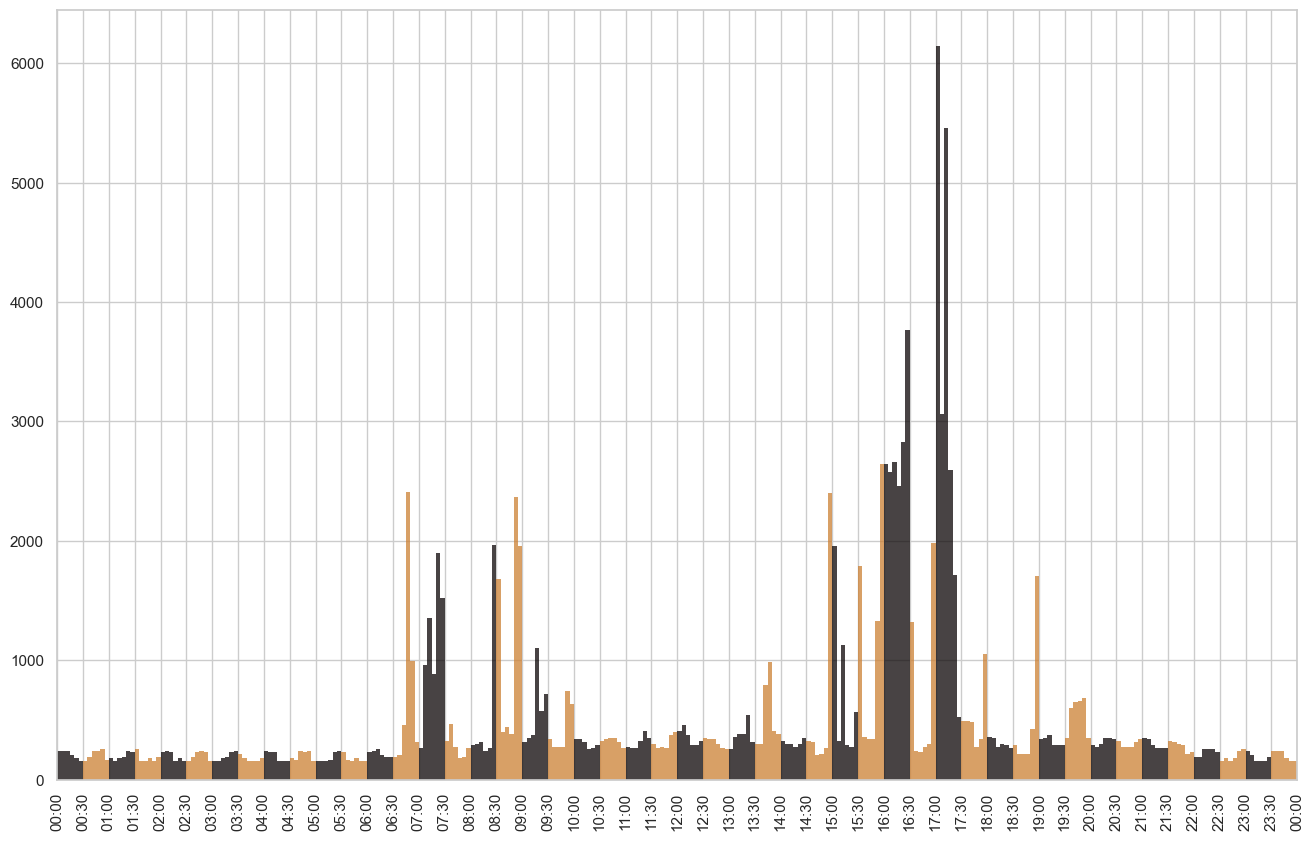

In [151]:
startdate = dt.datetime(2021,11,1,0)
enddate = dt.datetime(2021,11,2,0)
plot_time(startdate, enddate);

37 192


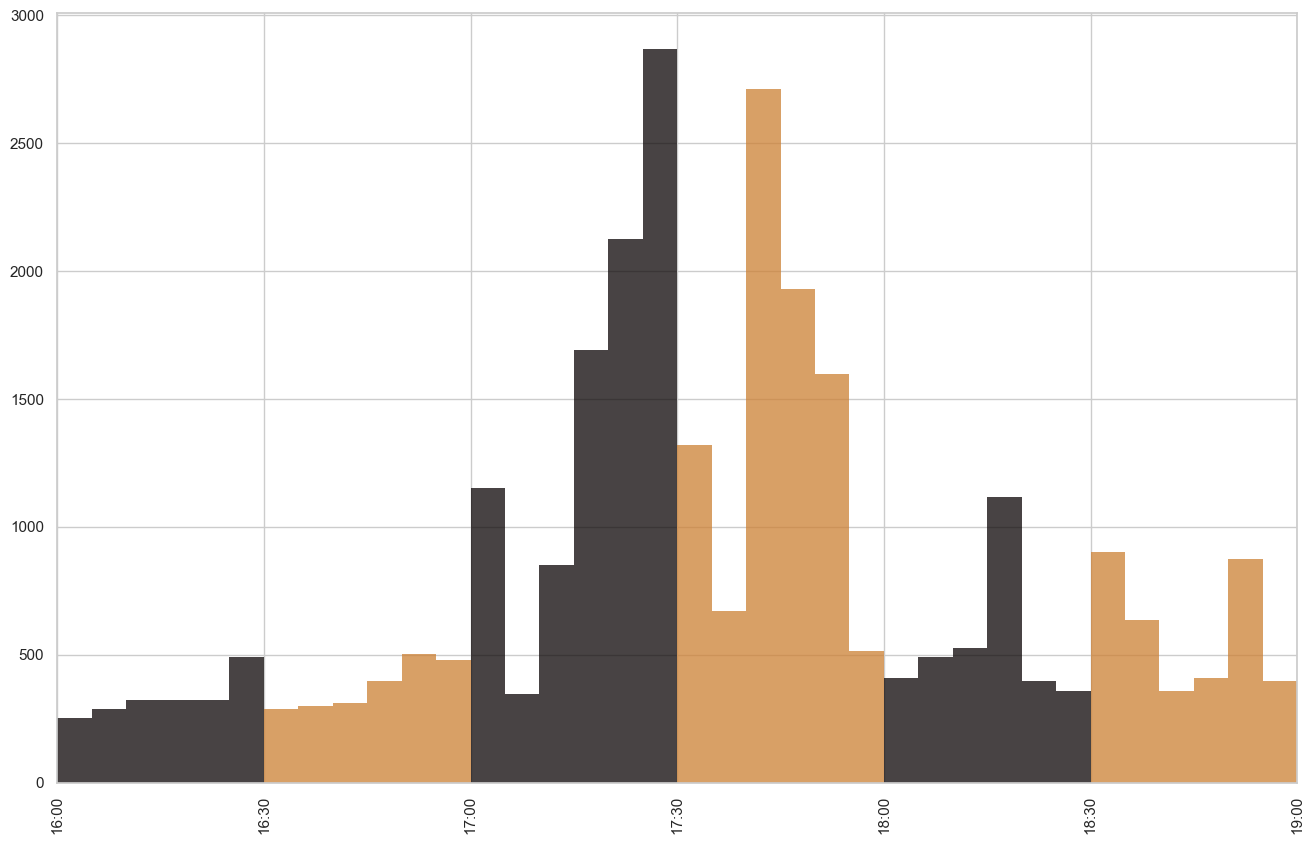

In [64]:
startdate = dt.datetime(2021,9,6,16)
enddate = dt.datetime(2021,9,6,19)
plot_time(startdate, enddate);

187 192


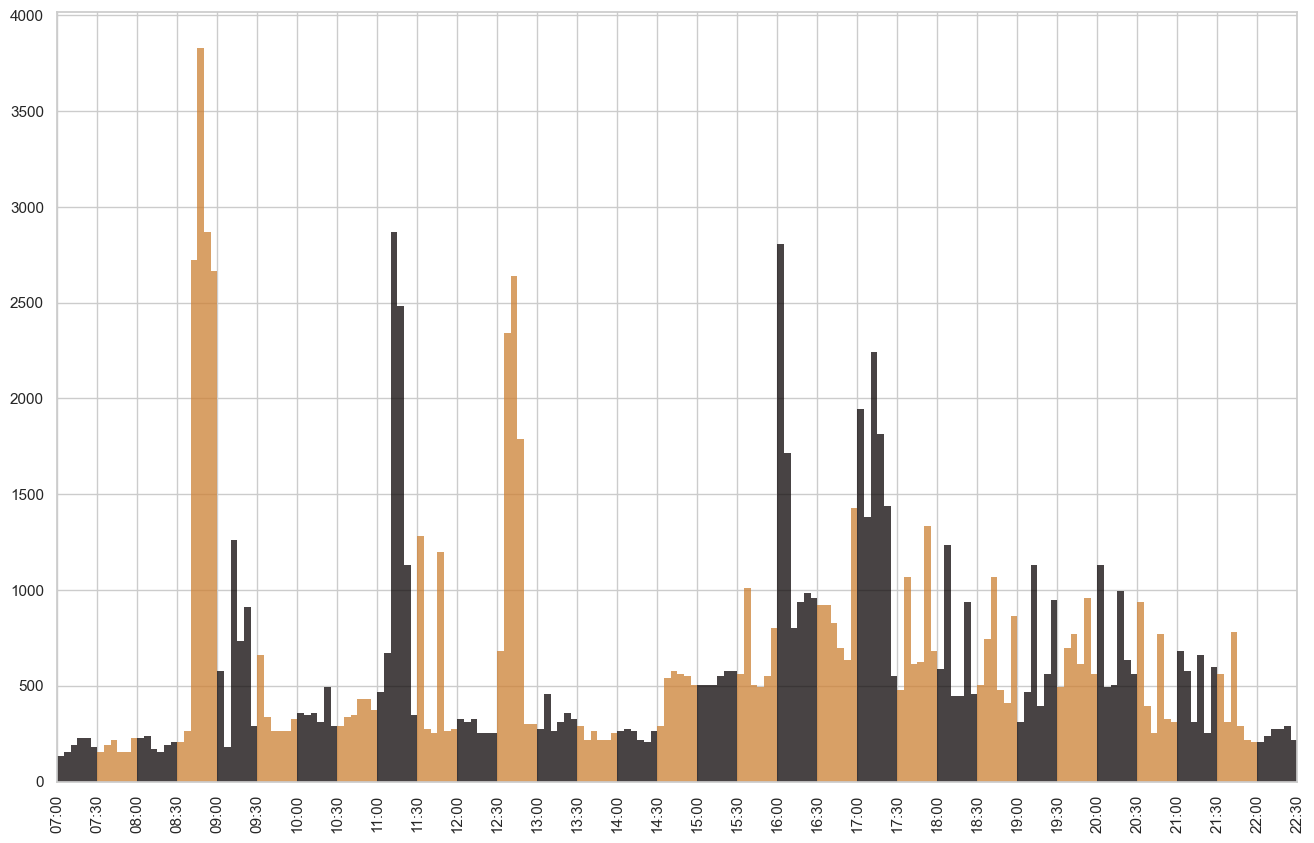

In [66]:
startdate = dt.datetime(2021,8,14,7)
enddate = dt.datetime(2021,8,14,22,30)
plot_time(startdate, enddate);

In [91]:
mpl.matplotlib_fname()

'C:\\Users\\Shaun\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

## Area Charts

In [144]:
def plot_profile(df):
#     percs = [0, 5, 25, 50, 75, 95, 100]
    percs = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    perclist = []
    for perc in percs:
        a = df.quantile(perc/100.)
        perclist.append(a.values)
    
    
    return perclist

p = plot_profile(df_30min_daily)

In [145]:
ts = np.arange(1, 48, step=2)+1
def period_to_time(period, interval=30):
    mod = 60 // interval
    return dt.time(((period+0) //mod)% 24,((period+0) % mod)*interval).strftime("%H:%M")

# ts = np.arange(0, 48, step=6)+6
# ts = np.arange(0, 48, step=6)+2

# ts = np.arange(0, 289, step=6)
tl = [period_to_time(t, 30) for t in ts]
print(ts)
print(tl)

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48]
['01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '00:00']


In [146]:
colorlist = [[0.005,0.05,.05],[0.2, 0.2, 0.2],[0.4, 0.4, 0.4],[0.6, 0.6, 0.6],[0.7, 0.7, 0.7]]
len(colorlist)

5

(0.0, 47.0)

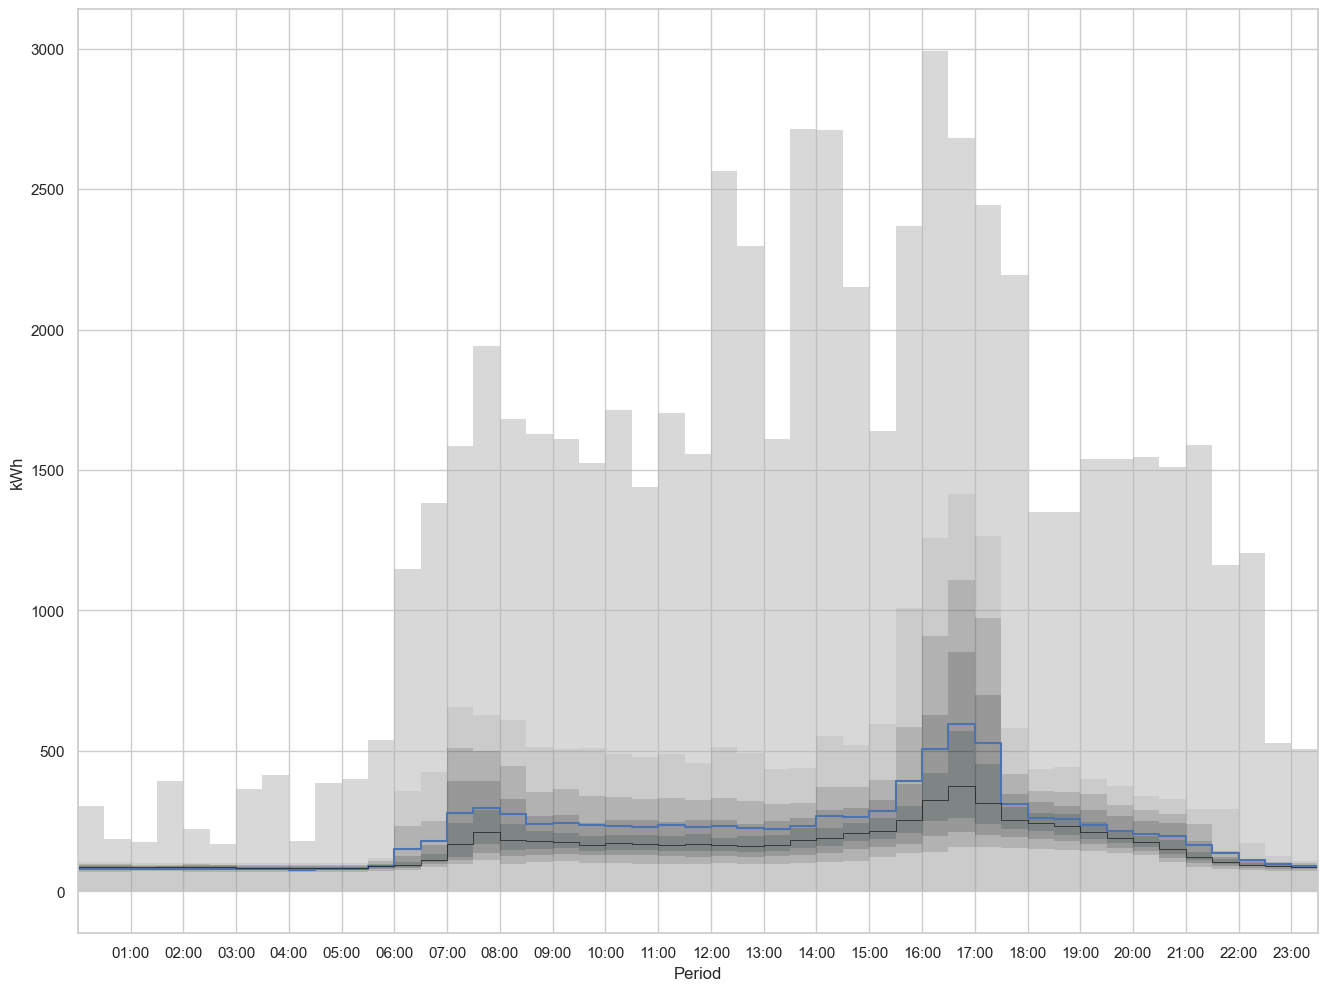

In [148]:
fig, ax = plt.subplots(figsize=(16,12))

x = np.repeat(range(48+1),2)[1:-1]

# Plot mean
y = df_30min_daily.mean()
# (p[0].repeat(2))
line0, = ax.plot(x, y.values.repeat(2))

# Plot Median
y = p[5].repeat(2)
line3, = ax.plot(x, y, color = 'k', lw=0.5)


# Plot shaded area
x = np.concatenate((x, x[::-1]))
x


# 0th percentile
for i in range(len(p)-1):
    j =abs(int(5.5-(i+1)))
    y = np.concatenate((p[i].repeat(2), p[i+1].repeat(2)[::-1]))
    line00, = ax.fill(x, y, alpha = 0.5, facecolor = colorlist[j], edgecolor='none', lw=0.5)

# y = np.concatenate((p[1].repeat(2), p[2].repeat(2)[::-1]))
# line10, = ax.fill(x, y, alpha = 0.25, facecolor = [0.6, 0.6, 0.6], lw=0.5)

# y = np.concatenate((p[2].repeat(2), p[3].repeat(2)[::-1]))
# line20, = ax.fill(x, y, alpha = 0.25, facecolor = [0.5, 0.5, 0.5], lw=0.5)

# y = np.concatenate((p[3].repeat(2), p[4].repeat(2)[::-1]))
# line30, = ax.fill(x, y, alpha = 0.25, facecolor = [0.4, 0.4, 0.4], lw=0.5)

# y = np.concatenate((p[4].repeat(2), p[5].repeat(2)[::-1]))
# line40, = ax.fill(x, y, alpha = 0.25, facecolor = [0.3, 0.3, 0.3], lw=0.5)

# y = np.concatenate((p[5].repeat(2), p[6].repeat(2)[::-1]))
# line8, = ax.fill(x, y, alpha = 0.25, facecolor = [0.75, 0.75, 0.75], lw=0.5)

# y = np.concatenate((p[6].repeat(2), p[7].repeat(2)[::-1]))
# line9, = ax.fill(x, y, alpha = 0.25, facecolor = [0.75, 0.75, 0.75], lw=0.5)

# y = np.concatenate((p[7].repeat(2), p[8].repeat(2)[::-1]))
# line10, = ax.fill(x, y, alpha = 0.25, facecolor = [0.75, 0.75, 0.75], lw=0.5)

# ax.legend((line0, line1, line2, line3, line4, line5, line6, line7, line8), ('Mean','Max', 'Rolling Peak Day','Median', '50-75th per', '75-95th per', '95th-Max per'))

# ax.grid('On')
ax.set_xlim([1,48])
# ax.set_ylim(bottom=0)
# ax.set_ylim([0,1])
ax.set_ylabel('kWh')
ax.set_xlabel('Period')


# for t in nt:
#     ax.axvspan(t[0], t[1], alpha=0.1, facecolor = '0.65', edgecolor = '0.65')

# ax.axvline(34, color='r',linestyle = ':')
# ax.axvline(42, color='r',linestyle = ':')


# mv = dplot['Average'].iloc[14:44].mean()
# xs = np.arange(14,46)
# ys = np.ones(32)*mv
# ax.plot(xs,ys)

# djm.plot(ax=ax, colormap='spring')

# drm.plot(ax=ax, colormap='binary')

ax.set_xticks(ts);
ax.set_xticklabels([period_to_time(t) for t in ts])
ax.xaxis.grid('On')
ax.set_xlim([0,47])
# print mv
# ax.axhline(mv)

# plot_profile(dfx)

In [149]:
df.loc['2021-05-01':].watt_hours

datetime
2021-05-01 00:00:00     3.00
2021-05-01 00:01:00     3.00
2021-05-01 00:02:00     1.00
2021-05-01 00:03:00     3.00
2021-05-01 00:04:00     3.00
                       ...  
2023-09-01 19:19:00    10.00
2023-09-01 19:20:00     8.75
2023-09-01 19:21:00    10.00
2023-09-01 19:22:00     8.75
2023-09-01 19:23:00    10.00
Name: watt_hours, Length: 1092915, dtype: float64

In [94]:
def plot_area(series):
    x, y = repeat_values(series)
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0)
    
    x = np.append(x, x[-1])
    y = np.append(y, 0)

In [110]:
# df_30min_daily.loc['2021-04-15']#.watt_hours
# df_30min_daily.index#.inferred_type
df.index

DatetimeIndex(['2021-04-15 14:36:00', '2021-04-15 14:37:00',
               '2021-04-15 14:38:00', '2021-04-15 14:39:00',
               '2021-04-15 14:40:00', '2021-04-15 14:41:00',
               '2021-04-15 14:42:00', '2021-04-15 14:43:00',
               '2021-04-15 14:44:00', '2021-04-15 14:45:00',
               ...
               '2023-09-01 19:14:00', '2023-09-01 19:15:00',
               '2023-09-01 19:16:00', '2023-09-01 19:17:00',
               '2023-09-01 19:18:00', '2023-09-01 19:19:00',
               '2023-09-01 19:20:00', '2023-09-01 19:21:00',
               '2023-09-01 19:22:00', '2023-09-01 19:23:00'],
              dtype='datetime64[ns]', name='datetime', length=1115079, freq=None)

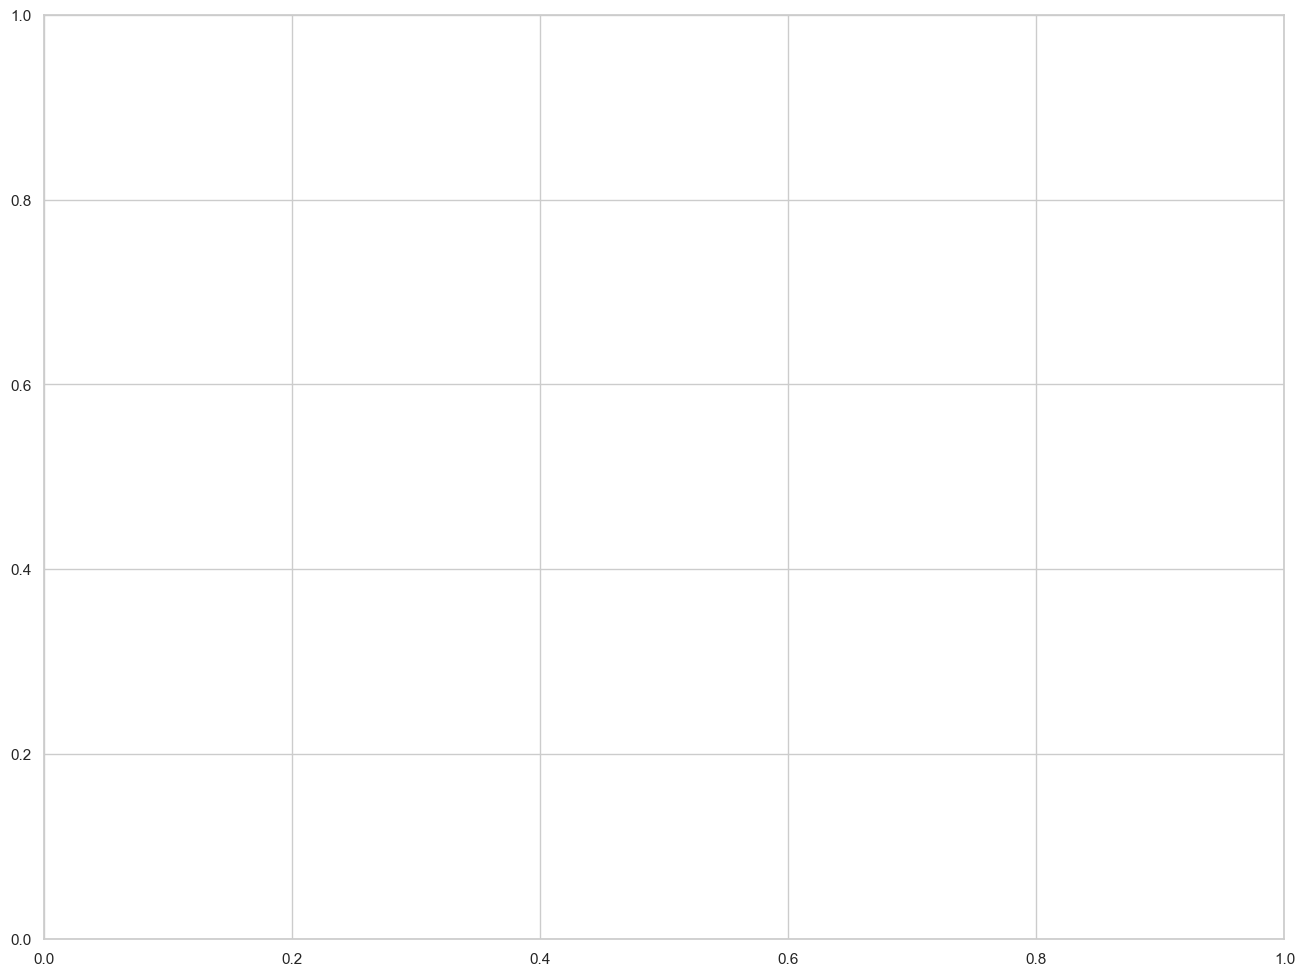

In [150]:
from matplotlib.dates import MinuteLocator, DateFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, NullFormatter)

fig, ax = plt.subplots(figsize=(16,12))

plot_area(df_30min.loc['2021-05-01':].watt_hours)
# x30, y30 = repeat_values(df_30min.loc['2021-05-01':].watt_hours)
# ax.plot(x30,y30, color='k', linewidth = 1)
# ax.fill_between(x, y, alpha=0.4, facecolor = 'grey')

# x5, y5 = repeat_values(df_5min.loc['2021-05-01':].watt_hours)
# ax.plot(xl, y5, color='b', linewidth = 1)

# x5, y5 = repeat_values(df_5min.loc['2021-05-01':].watt_hours)
# ax.plot(xl, y5, color='r', linewidth = 1)



# x, y = repeat_values(df_30min.loc['2021-05-01':].watt_hours)
# ax.plot(x,y, linewidth = 1, color='green')
# ax.fill_between(x, y, alpha=0.4, facecolor = 'red')

# ax.fill_between(x, y, y>y30, alpha=0.4, facecolor = 'grey')


# ax.set_xticks(ts)
# ax.set_xticklabels(tl)

# majorLoc = MinuteLocator(byminute=np.arange(0,60,30))
# minorLoc = MinuteLocator(byminute=np.arange(0,60,5))
# ax.xaxis.set_major_locator(majorLoc)
# ax.xaxis.set_minor_locator(minorLoc)

# ax.xaxis.set_major_locator(MultipleLocator(6))
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_minor_formatter(NullFormatter())

# ax.yaxis.set_minor_locator(MultipleLocator(60))

# ax.yaxis.set_minor_formatter(NullFormatter())

# ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
# ax.xaxis.set_minor_formatter(DateFormatter('%H:%M'))
# ax.grid(visible=True, which='minor', color='w', linewidth=0.5)

# period_to_time(period, interval=30)

# ax.set_ylim(bottom=0)
# ax.autoscale(axis='x', tight=True)
# plt.xticks(rotation = 90, ha='center');

# )ax.set_xlim(pd.Timestamp('2021-04-19 14:00'), pd.Timestamp('2021-04-19 22:00')
# ax.set_xlim(192,204+6*6)

In [29]:
data_ary = df_30min.loc['2021-04-18'].watt_hours.values
print(len(data_ary))
y = data_ary.repeat(2)
print(len(y))

48
96


In [19]:
def transpose_df(df):
    dff = df.copy()
    dff['Interval'] = df.index

watt_hours  cost_dollars
datetime                                     
2021-04-15 14:30:00       280.0      0.082098
2021-04-15 15:00:00       186.0      0.060549
2021-04-15 15:30:00       183.0      0.059927
2021-04-15 16:00:00       188.0      0.061794
2021-04-15 16:30:00       210.0      0.066149
...                         ...           ...
2021-09-07 13:30:00       349.0      0.101923
2021-09-07 14:00:00       135.0      0.047795
2021-09-07 14:30:00       616.0      0.167561
2021-09-07 15:00:00       283.0      0.084814
2021-09-07 15:30:00        57.0      0.018849

[6963 rows x 2 columns]

In [11]:
df_30min

watt_hours  cost_dollars
datetime                                     
2021-04-15 14:30:00       280.0      0.082098
2021-04-15 15:00:00       186.0      0.060549
2021-04-15 15:30:00       183.0      0.059927
2021-04-15 16:00:00       188.0      0.061794
2021-04-15 16:30:00       210.0      0.066149
...                         ...           ...
2021-09-07 13:30:00       349.0      0.101923
2021-09-07 14:00:00       135.0      0.047795
2021-09-07 14:30:00       616.0      0.167561
2021-09-07 15:00:00       283.0      0.084814
2021-09-07 15:30:00        57.0      0.018849

[6963 rows x 2 columns]

In [80]:
ts = np.arange(0, 48, step=6)+6
ts = np.arange(0, 48, step=6)+2

ts = np.arange(0, 48, step=6)+2
def period_to_time(period):
    return dt.time((period //2) % 24,(period % 2)*30).strftime("%H:%M")
tl = [period_to_time(t) for t in ts]

# (47 / 2)

In [34]:
period = 5
(period //2) % 24
(period % 2)*30

30

In [35]:
def period_to_time(period):
    return dt.time((period //2) % 24,(period % 2)*30).strftime("%H:%M")

[period_to_time(t) for t in ts]

['01:00', '04:00', '07:00', '10:00', '13:00', '16:00', '19:00', '22:00']

In [87]:
df_30min_daily[-31:]

Period_01  Period_02  Period_03  Period_04  Period_05  \
Settlement_Date                                                          
2023-08-02          100.00      97.50      82.50      87.50      97.50   
2023-08-03           90.00      78.75      77.50      90.00      90.00   
2023-08-04           82.50      85.00      91.25      91.25      85.00   
2023-08-05           95.00      93.75      81.25      83.75      95.00   
2023-08-06           85.00      92.50      85.00      75.00      91.25   
...                    ...        ...        ...        ...        ...   
2023-08-28           91.25      76.25      80.00      88.75      88.75   
2023-08-29           78.75      83.75      92.50      87.50      76.25   
2023-08-30           93.75      90.00      82.50      85.00      93.75   
2023-08-31          145.00     146.25     153.75     148.75     131.25   
2023-09-01          145.00     138.75     148.75     148.75     222.50   

                 Period_06  Period_07  Period_08  Period_09  Period_10  ...  \
Settlement_Date                                                         ...   
2023-08-02           92.50      81.25      93.75      95.00      85.00  ...   
2023-08-03           78.75     158.75     118.75      98.75      96.25  ...   
2023-08-04           81.25      88.75      90.00      90.00      77.50  ...   
2023-08-05           93.75      78.75      87.50      93.75      85.00  ...   
2023-08-06           92.50      77.50      83.75      91.25      83.75  ...   
...                    ...        ...        ...        ...        ...  ...   
2023-08-28           75.00      80.00      87.50      85.00      71.25  ...   
2023-08-29           88.75      91.25      81.25      76.25      88.75  ...   
2023-08-30           92.50      82.50      80.00      92.50      92.50  ...   
2023-08-31          143.75     142.50     128.75     132.50     140.00  ...   
2023-09-01          165.00     146.25     148.75     133.75     126.25  ...   

                 Period_39  Period_40  Period_41  Period_42  Period_43  \
Settlement_Date                                                          
2023-08-02          450.00     240.00     243.75     133.75     122.50   
2023-08-03          455.00     172.50     156.25     152.50     141.25   
2023-08-04          205.00     182.50     187.50     193.75     173.75   
2023-08-05          173.75     160.00     191.25     181.25     181.25   
2023-08-06          262.50     200.00     171.25     155.00     117.50   
...                    ...        ...        ...        ...        ...   
2023-08-28           95.00     306.25     432.50     177.50     121.25   
2023-08-29          366.25     613.75     340.00     237.50     181.25   
2023-08-30          297.50     626.25     522.50     251.25     518.75   
2023-08-31          492.50     266.25     247.50     247.50     203.75   
2023-09-01             NaN        NaN        NaN        NaN        NaN   

                 Period_44  Period_45  Period_46  Period_47  Period_48  
Settlement_Date                                                         
2023-08-02          101.25      87.50      78.75      83.75      85.00  
2023-08-03          106.25      91.25     105.00      97.50      90.00  
2023-08-04          122.50     116.25      96.25      82.50      86.25  
2023-08-05          158.75     110.00      97.50      93.75      83.75  
2023-08-06          103.75      95.00      90.00      80.00      76.25  
...                    ...        ...        ...        ...        ...  
2023-08-28          103.75      83.75      80.00      95.00      92.50  
2023-08-29          113.75      97.50      86.25      82.50      91.25  
2023-08-30          308.75     163.75     155.00     161.25      92.50  
2023-08-31          188.75     155.00     148.75     157.50     158.75  
2023-09-01             NaN        NaN        NaN        NaN     156.25  

[31 rows x 48 columns]

In [88]:
df_30min_daily.sample(3)

Period_01  Period_02  Period_03  Period_04  Period_05  \
Settlement_Date                                                          
2021-11-21            64.0       63.0       69.0       71.0       70.0   
2021-08-28            95.0       92.0       78.0       85.0       92.0   
2021-06-29            88.0       76.0       88.0       93.0       82.0   

                 Period_06  Period_07  Period_08  Period_09  Period_10  ...  \
Settlement_Date                                                         ...   
2021-11-21            65.0       61.0       65.0       71.0       78.0  ...   
2021-08-28            86.0       75.0       94.0       95.0       76.0  ...   
2021-06-29            81.0       94.0       86.0       73.0       92.0  ...   

                 Period_39  Period_40  Period_41  Period_42  Period_43  \
Settlement_Date                                                          
2021-11-21           181.0      177.0      176.0      129.0       77.0   
2021-08-28           343.0      330.0      252.0      214.0      265.0   
2021-06-29           238.0      281.0      365.0      169.0      163.0   

                 Period_44  Period_45  Period_46  Period_47  Period_48  
Settlement_Date                                                         
2021-11-21            70.0       73.0       73.0       71.0       69.0  
2021-08-28           166.0      123.0      106.0       95.0      398.0  
2021-06-29           608.0      271.0      166.0      402.0       92.0  

[3 rows x 48 columns]

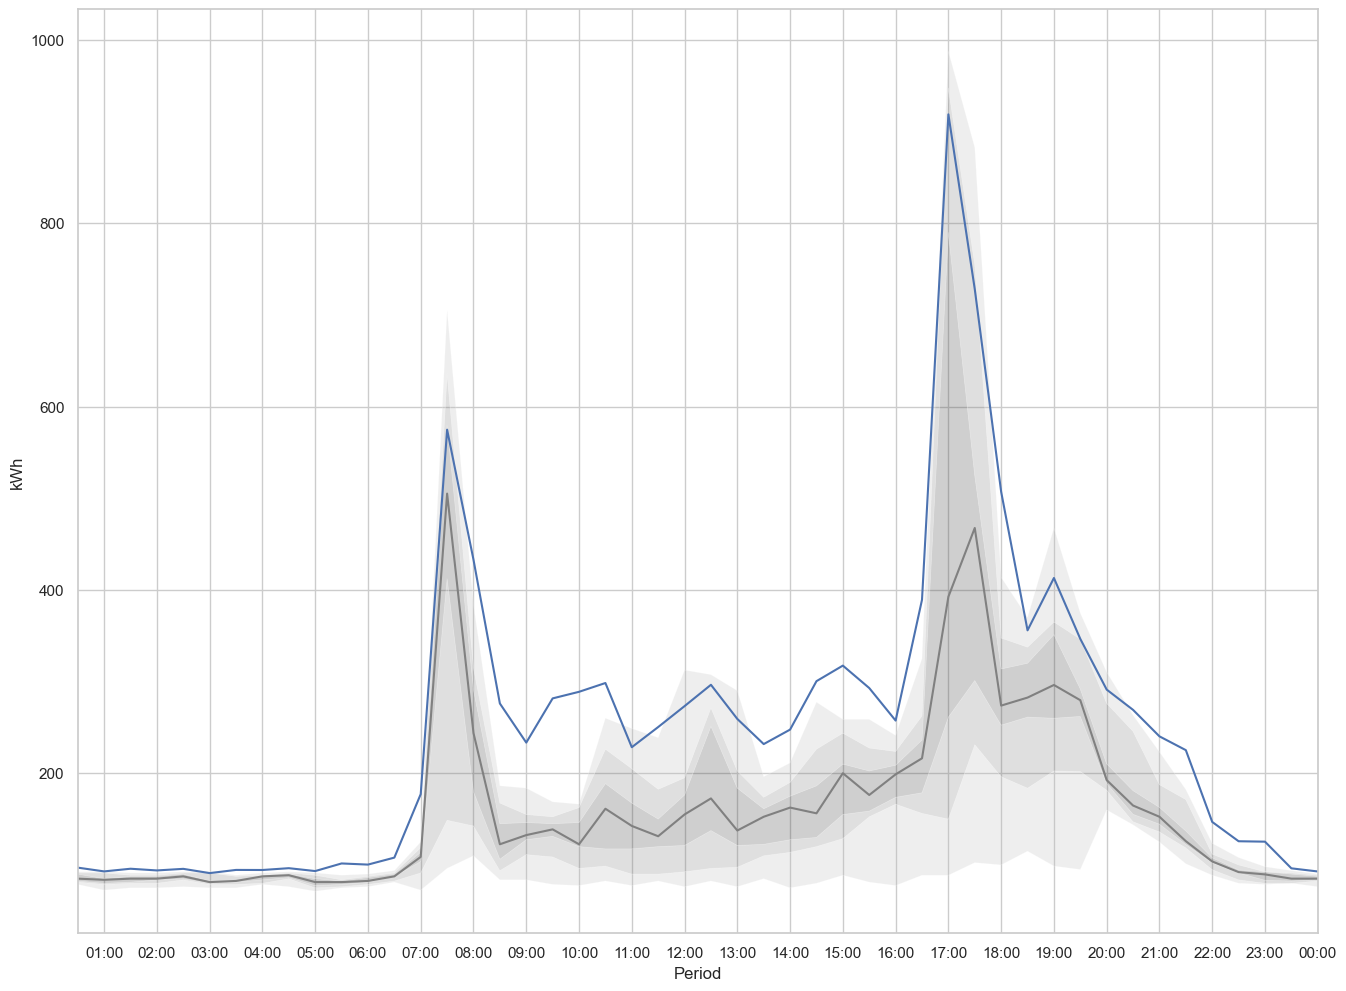

In [89]:
def create_distplot(df):
    fig, ax = plt.subplots(figsize=(16,12))

    p = plot_profile(df)
    x = np.arange(48) + 1

    # Plot mean
    line0, = ax.plot(x, df.mean())  
#     ax.plot(x, df.sample(3).T)
    
    # Plot Median
    line3, = ax.plot(x, p[3], color = [0.5,0.5,0.5])

    # Plot shaded area
    x = np.concatenate((x, x[::-1]))

    # 0th percentile
    y = np.concatenate((p[0], p[1][::-1]))
    line4, = ax.fill(x, y, alpha = 0.25, facecolor = [0.75, 0.75, 0.75], lw=0.5)

    y = np.concatenate((p[1], p[2][::-1]))
    line4, = ax.fill(x, y, alpha = 0.25, facecolor = [0.5, 0.5, 0.5], lw=0.5)

    y = np.concatenate((p[2], p[3][::-1]))
    line5, = ax.fill(x, y, alpha = 0.25, facecolor = [0.25, 0.25, 0.25], lw=0.5)

    y = np.concatenate((p[3], p[4][::-1]))
    line6, = ax.fill(x, y, alpha = 0.25, facecolor = [0.25, 0.25, 0.25], lw=0.5)

    y = np.concatenate((p[4], p[5][::-1]))
    line7, = ax.fill(x, y, alpha = 0.25, facecolor = [0.5, 0.5, 0.5], lw=0.5)

    y = np.concatenate((p[5], p[6][::-1]))
    line8, = ax.fill(x, y, alpha = 0.25, facecolor = [0.75, 0.75, 0.75], lw=0.5)

    # ax.legend((line0, line1, line2, line3, line4, line5, line6, line7, line8), ('Mean','Max', 'Rolling Peak Day','Median', '50-75th per', '75-95th per', '95th-Max per'))

    # ax.grid('On')
    ax.set_xlim([1,48])
    # ax.set_ylim(bottom=0)
    # ax.set_ylim([0,1])
    ax.set_ylabel('kWh')
    ax.set_xlabel('Period')


    # for t in nt:
    #     ax.axvspan(t[0], t[1], alpha=0.1, facecolor = '0.65', edgecolor = '0.65')

    # ax.axvline(34, color='r',linestyle = ':')
    # ax.axvline(42, color='r',linestyle = ':')


    # mv = dplot['Average'].iloc[14:44].mean()
    # xs = np.arange(14,46)
    # ys = np.ones(32)*mv
    # ax.plot(xs,ys)

    # djm.plot(ax=ax, colormap='spring')

    # drm.plot(ax=ax, colormap='binary')

    ax.set_xticks(ts)
    ax.set_xticklabels([period_to_time(t) for t in ts])
    ax.xaxis.grid('On')

    # print mv
    # ax.axhline(mv)

create_distplot(df_30min_daily[-31:])

In [ ]:

# FROM https://stackoverflow.com/questions/53071379/using-percentiles-of-a-timeseries-to-set-colour-gradient-in-pythons-matplotlib
n = 11
colormap = cm.Blues
percentiles = np.linspace(0,100,n)

SDist = np.zeros((48,n))
for i in range(n):
    for t in range(48):
        SDist[t, i] = np.percentile(df.iloc[:,t], percentiles[i])
        
half = int((n-1)/2)


fig, ax = plt.subplots(figsize=(16,12))

ax.plot(range(48), df.mean(axis=0), color='k')
ax.plot(range(48), SDist[:,half], color='g')

for i in range(half):
    ax.fill_between(range(48), SDist[:,i], SDist[:,-(i+1)], color=colormap(i/half), alpha = 0.5)
    
# ax.set_ylim([0, 0.5])

In [ ]:
period = 6
(period //2) % 24,(period % 2)*30

In [ ]:
fig = plt.Figure(figsize=(16,10))
x = df.columns
# y1=df.loc['2018-06-29']
# y2=df.loc['2018-06-30']
# y3=df.loc['2018-07-01']

y1=df.loc['2021-03-20']
y2=df.loc['2021-03-21']
y3=df.loc['2021-03-22']

ax1 = plt.subplot(3,1,1)
ax1.bar(x, y1)

ax2 = plt.subplot(3,1,2)
ax2.bar(x, y2)

ax3 = plt.subplot(3,1,3)
ax3.bar(x, y3)

In [ ]:
df.sample(1).values
# df.loc['2021-03-10']

In [ ]:
startdate = dt.date(2021,5,1)
enddate = dt.date(2021,5,30)


def plot_month(ax, df):

    for i, (name, row) in enumerate(df.iterrows()):
        d = '1'#pd.to_datetime(name[3]).strftime('%d')
#         t = row['MaxTemp']   
        color = 'grey'        
        ax.plot(row, color = color, linewidth = 0.5, alpha = 0.2)

    avg = df.mean(axis=0)
    ax.plot(avg, 'k', linewidth = 2)
    ax.set_xticks(ts)
    ax.set_xticklabels(tl)
    ax.xaxis.grid('On')
#     ax.legend(loc='best', facecolor='k', framealpha=0.2, edgecolor ='k', frameon=True)
    ax.set_xlim([0,47])
    
    return avg

fig, ax = plt.subplots(figsize=(12,8))
plot_month(ax, df.loc[str(startdate):str(enddate)]);
# y1=df.loc['2021-03-10']
# y2=df.loc['2021-03-22']
# y3=df.loc['2021-03-23']
y1 = df.loc[str(startdate):str(enddate)].sample(1)
ax.plot(y1.T, 'r')
ax.set_xlim([1,47])
ax.set_ylabel('Energy (kWh per half hour)')

In [ ]:
def plot_hm(df):
    ytl = df.index.strftime('%a %d-%b')
#     cmap = sns.color_palette("YlOrRd",100)
    cmap = sns.color_palette("rocket_r", 40)
    labels = df.applymap(lambda v: '{:3.1f}'.format(v) if v > 1.0 else "")
    sns.heatmap(df, cmap=cmap, yticklabels=ytl, linewidth=0.01
               ,linecolor="grey"
#                ,annot = labels, annot_kws={'fontsize':10}, fmt = ''
               )#, vmin=0, vmax=3.5)
    axes = fig.gca()
#     axes.yaxis.grid(False)
    axes.set_xticks(ts);
    axes.set_xticklabels([period_to_time(t) for t in ts]);

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
plot_hm(df[(df.index >='2021-01-01') & (df.index <'2021-04-01')])

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
plot_hm(df[(df.index >='2020-01-01') & (df.index <'2020-02-01')])

In [ ]:
df.sum().sum()
dcf.sum().sum()

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
x = df.columns

# y1=df.loc['2018-06-29']
# y2=df.loc['2018-06-30']
# y3=df.loc['2018-07-13']

# y1=df.loc['2018-12-24']
# y2=df.loc['2018-12-26']
# y3=df.loc['2018-12-01']

y1=df.loc['2021-03-21']
# y2=df.loc['2021-03-22']
# y3=df.loc['2021-03-23']



ax.plot(x, y1)
# ax.plot(x, y2)
# ax.plot(x, y3)
ax.plot(x, df.loc['2021-03-01':'2021-03-31'].mean(axis=0), 'k')
# ax.bar(x, [y1, y2, y3])
print(x)

In [ ]:
df[df.index >'2021-01-07'].applymap(lambda v: '{:3.1f}'.format(v) if v > 0.2 else "")

In [ ]:
df.mean().plot(legend = 'Cropley')
# df.max().plot(legend = 'Cropley')
# df.std().plot()
dcf.mean().plot()
ax = plt.gca()
ax.legend(['C','E'])
# ax.plot(df.loc['2019-06-28'])

In [ ]:
df.T.plot(legend=False)

## Daily

In [ ]:
df_daily = df.sum(axis=1).to_frame('Cons')
dcf_daily = dcf.sum(axis=1).to_frame('Cons')

In [ ]:
bins = np.arange(0,25,0.5)
bins = np.linspace(0,20,50);
df_daily.plot(kind='hist', bins=bins, normed = True)
dcf_daily.plot(kind='hist', bins=bins, normed = True)

In [ ]:
x1 = df_daily['Cons']
bins = np.linspace(0,20,50);
fix, ax = plt.subplots(figsize=(10,5));

ax.hist(x1, bins, histtype='stepfilled', alpha=0.5, normed=True);

x2 = dcf_daily['Cons']
ax.hist(x2, bins, histtype='stepfilled', alpha=0.5, normed=True);

In [ ]:
df_daily.sort_values(by='Cons', ascending=False)

In [ ]:
ax = df_daily.plot()
ax2 = dcf_daily.plot()
ax3 = df_daily.rolling(365).sum().plot()
dcf_daily.rolling(365).sum().plot(ax =ax3)
ax3.set_ylim(bottom = 0)

In [ ]:
fig, ax = plt.subplots()
df_daily.groupby(df_daily.index.month).mean().plot(ax=ax, kind='bar')
# dcf_daily.groupby(dcf_daily.index.month).sum().plot(ax=ax, kind='bar')
ax.set_ylim(bottom=0)

In [ ]:
df_daily.groupby(df_daily.index.month).mean().sum()

In [ ]:
fig, ax = plt.subplots()
df_daily[df_daily.index.year == 2020].groupby(df_daily[df_daily.index.year == 2020].index.month).sum().plot(ax=ax, kind='bar')
# df_daily[df_daily.index.year == 2021].groupby(df_daily[df_daily.index.year == 2021].index.month).sum().plot(ax=ax, kind='bar')
# df_daily[df_daily.index.year == 2019].groupby(df_daily[df_daily.index.year == 2019].index.month).sum().plot(ax=ax, kind='bar')

# Older Stuff

In [ ]:
header = ['RecordIndicator','IntervalDate']+['IntervalValue%02d'% (x+1) for x in range(48)]+['QualityMethod','ReasonCode','ReasonDescription','UpdateDateTime','MSATSLoadDateTime']

In [ ]:
filename = '62038160906_20150814_20170814_lastrowremoved.txt'
if os.path.isfile(filename):
#     dateparse = lambda dates: [pd.datetime.strptime(d, '%d/%m/%Y %H:%M:%S') for d in dates]
    dateparse = lambda dates: [pd.datetime.strptime(d, '%Y%m%d') for d in dates]
    
    df = pd.read_csv(filename, 
                       names=header, 
                       skiprows=2, 
                       parse_dates=[1], 
                       date_parser=dateparse)
    print "loaded ", filename, " successfully"
else:
    print "File ", filename, " not found"
df.dropna(axis=1, how = 'all', inplace=True)
df.drop(['RecordIndicator'],1, inplace=True)
df = df[['IntervalDate','QualityMethod','UpdateDateTime']+['IntervalValue%02d' % (x+1) for x in range(48)]]
df.set_index('IntervalDate', inplace=True)
# data.index = data['IntervalDate']
# del data['IntervalDate']
df

In [ ]:
df.reset_index()

In [ ]:
df_hh = pd.melt(df.reset_index(), id_vars=['IntervalDate','QualityMethod'], 
        value_vars=['IntervalValue%02d' % (x+1) for x in range(48)],
       var_name = 'Interval', value_name = 'ReadValue')
df_hh['Interval'] = df_hh['Interval'].str[13:].astype(int)
df_hh['IntervalDate'] = df_hh.apply(lambda row: row.IntervalDate + pd.Timedelta(minutes = 30*(row.Interval-1)), axis=1)
df_hh = df_hh.set_index(['IntervalDate'])
# df_hh.drop('Interval')
df_hh.sort_index(inplace=True)
df_hh

In [ ]:
df_hh.plot(y = 'ReadValue')

In [ ]:
df[df.index.dayofweek == 6]

In [ ]:
#data['weekday'] = data.index.weekday
df['weekday'] = data['weekday'].apply(lambda x: 1 if x < 5 else 0)
data

In [ ]:
dataf = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994', '2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592', '2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109', '2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877'],
        'battle_deaths': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41]}
df = pd.DataFrame(dataf, columns = ['date', 'battle_deaths'])
print(df)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.index = df['date']
del df['date']
df

In [ ]:
df['weekday'] = df.index.weekday

In [ ]:
df['weekday'].apply(lambda x: 1 if x < 5 else 0)

### Get Public Holidays

In [12]:
from pandas.tseries.holiday import Holiday, EasterMonday, GoodFriday, AbstractHolidayCalendar, next_monday, MO, next_workday, nearest_workday
from pandas.tseries.offsets import DateOffset, CustomBusinessDay
from datetime import datetime
def after_nearest_workday(dt):
    """
    returns next workday after nearest workday
    needed for Boxing day or multiple holidays in a series
    got this from https://stackoverflow.com/questions/30485984/pandas-time-series-holiday-rule-offset
    """
    return next_workday(nearest_workday(dt))

In [ ]:
AFLGrandFinal2016 = Holiday('Friday Before Grand Final Day 2016', year = 2016, month=9, day = 30)

In [15]:
class VicCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year\'s day', month = 1, day = 1, observance=next_monday),
        Holiday('Australia Day', month = 1, day = 26, observance=next_monday),
        Holiday('Labour Day', month = 3, day =1, offset = DateOffset(weekday=MO(2))),
        EasterMonday,
        GoodFriday,
        Holiday('Friday Before Grand Final Day 2015', year = 2015, month=10, day = 2),
        Holiday('Friday Before Grand Final Day 2016', year = 2016, month=9, day = 30),
        Holiday('Friday Before Grand Final Day 2017', year = 2017, month=9, day = 29),
        Holiday('ANZAC Day', month = 1, day = 25, observance=next_monday),
        Holiday('Queen\'s Birthday', month = 6, day =1, offset = DateOffset(weekday=MO(2))),
        Holiday('Melbourne Cup Day', month = 11, day =1, offset = DateOffset(weekday=MO(1))),
        Holiday('Christmas Day', month = 12, day =25, observance=next_monday),
        Holiday('Boxing Day', month = 12, day =26, observance=after_nearest_workday)
    ]

In [18]:
cal = VicCalendar()
vicholidays = VicCalendar().holidays(datetime(2020,12,1),datetime(2021,1,31))
# cal.holidays(datetime(2016,1,1),datetime(2016,12,31))
vicholidays

DatetimeIndex(['2020-12-25', '2020-12-28', '2021-01-01', '2021-01-25',
               '2021-01-26'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
weekend_and_holiday_offset - CustomBusinessDay(calendar=VicCalendar())

In [ ]:
df[df.index.isin(vicholidays) ==True]

In [ ]:
df['daily'] = df.iloc[:,3:51].sum(axis =1)

In [ ]:
df

In [ ]:
df.plot(y='daily')

In [ ]:
df = pd.melt(df, id_vars=['IntervalDate','QualityMethod'], 
        value_vars=['IntervalValue%02d' % (x+1) for x in range(48)],
       var_name = 'Interval', value_name = 'Read')



In [ ]:
df

In [ ]:
data.sort_values(['IntervalDate','Interval'])

In [ ]:
data['Interval'] = data['Interval'].str.extract('(\d+)').astype(int)

In [ ]:
ts = pd.DatetimeIndex(data.IntervalDate + data.Interval*pd.to_timedelta(30, unit='T'))
data['HHDateTime'] = ts
# data2['Month'] = ts.month
# data2.head()
data

In [ ]:
data.plot(x='HHDateTime',y='Read')

In [ ]:
data.groupby(['IntervalDate']).max().plot()

In [ ]:
dates = pd.DatetimeIndex(data['IntervalDate'])
dates.month
data['Month'] = dates.month

In [ ]:
data.groupby(['Month']).max()

In [27]:
import matplotlib.cm as cm
cm.jet(10)

(0.0, 0.0, 0.67825311942959, 1.0)

In [28]:
colors = np.repeat(['red'],32)
colors

array(['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red'], dtype='<U3')

In [51]:
my_tuple_1 = (0.1, 0.5, 0.6, 1)
my_tuple_2 = (0.2, 0.8, 0.1, 1)
colors = (my_tuple_1, ) * 32
colors

((0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1),
 (0.1, 0.5, 0.6, 1))

In [52]:
colors = np.array(
    ([(0.04, 0.015, 0.02, 1.0)] * 1 + [(0.8, 0.5, 0.2, 1.0)] * 1) * 16, dtype=object
)
colors.shape

(32, 4)

In [53]:
colors = np.array([my_tuple_1, my_tuple_2] * 32
colors = [(0.04, 0.015, 0.02, 1.0), (0.8, 0.5, 0.2, 1.0)] * 32
                  
colors

SyntaxError: invalid syntax (<ipython-input-53-48b325781914>, line 2)

In [54]:
np.array(([(0.04, 0.015, 0.02, 1.0)] * 2 + [(0.8, 0.5, 0.2, 1.0)] * 3) * 4)

array([[0.04 , 0.015, 0.02 , 1.   ],
       [0.04 , 0.015, 0.02 , 1.   ],
       [0.8  , 0.5  , 0.2  , 1.   ],
       [0.8  , 0.5  , 0.2  , 1.   ],
       [0.8  , 0.5  , 0.2  , 1.   ],
       [0.04 , 0.015, 0.02 , 1.   ],
       [0.04 , 0.015, 0.02 , 1.   ],
       [0.8  , 0.5  , 0.2  , 1.   ],
       [0.8  , 0.5  , 0.2  , 1.   ],
       [0.8  , 0.5  , 0.2  , 1.   ],
       [0.04 , 0.015, 0.02 , 1.   ],
       [0.04 , 0.015, 0.02 , 1.   ],
       [0.8  , 0.5  , 0.2  , 1.   ],
       [0.8  , 0.5  , 0.2  , 1.   ],
       [0.8  , 0.5  , 0.2  , 1.   ],
       [0.04 , 0.015, 0.02 , 1.   ],
       [0.04 , 0.015, 0.02 , 1.   ],
       [0.8  , 0.5  , 0.2  , 1.   ],
       [0.8  , 0.5  , 0.2  , 1.   ],
       [0.8  , 0.5  , 0.2  , 1.   ]])

In [55]:
((my_tuple_1,)*3, (my_tuple_2,)*3) * 4

(((0.1, 0.5, 0.6, 1), (0.1, 0.5, 0.6, 1), (0.1, 0.5, 0.6, 1)),
 ((0.2, 0.8, 0.1, 1), (0.2, 0.8, 0.1, 1), (0.2, 0.8, 0.1, 1)),
 ((0.1, 0.5, 0.6, 1), (0.1, 0.5, 0.6, 1), (0.1, 0.5, 0.6, 1)),
 ((0.2, 0.8, 0.1, 1), (0.2, 0.8, 0.1, 1), (0.2, 0.8, 0.1, 1)),
 ((0.1, 0.5, 0.6, 1), (0.1, 0.5, 0.6, 1), (0.1, 0.5, 0.6, 1)),
 ((0.2, 0.8, 0.1, 1), (0.2, 0.8, 0.1, 1), (0.2, 0.8, 0.1, 1)),
 ((0.1, 0.5, 0.6, 1), (0.1, 0.5, 0.6, 1), (0.1, 0.5, 0.6, 1)),
 ((0.2, 0.8, 0.1, 1), (0.2, 0.8, 0.1, 1), (0.2, 0.8, 0.1, 1)))

In [58]:
colors = np.zeros(32)
colors[]

SyntaxError: invalid syntax (<ipython-input-58-6db3e148d1e3>, line 2)

In [59]:
colors = np.tile([(my_tuple_1), (my_tuple_2)], 16)
colors

array([[0.1, 0.5, 0.6, 1. , 0.1, 0.5, 0.6, 1. , 0.1, 0.5, 0.6, 1. , 0.1,
        0.5, 0.6, 1. , 0.1, 0.5, 0.6, 1. , 0.1, 0.5, 0.6, 1. , 0.1, 0.5,
        0.6, 1. , 0.1, 0.5, 0.6, 1. , 0.1, 0.5, 0.6, 1. , 0.1, 0.5, 0.6,
        1. , 0.1, 0.5, 0.6, 1. , 0.1, 0.5, 0.6, 1. , 0.1, 0.5, 0.6, 1. ,
        0.1, 0.5, 0.6, 1. , 0.1, 0.5, 0.6, 1. , 0.1, 0.5, 0.6, 1. ],
       [0.2, 0.8, 0.1, 1. , 0.2, 0.8, 0.1, 1. , 0.2, 0.8, 0.1, 1. , 0.2,
        0.8, 0.1, 1. , 0.2, 0.8, 0.1, 1. , 0.2, 0.8, 0.1, 1. , 0.2, 0.8,
        0.1, 1. , 0.2, 0.8, 0.1, 1. , 0.2, 0.8, 0.1, 1. , 0.2, 0.8, 0.1,
        1. , 0.2, 0.8, 0.1, 1. , 0.2, 0.8, 0.1, 1. , 0.2, 0.8, 0.1, 1. ,
        0.2, 0.8, 0.1, 1. , 0.2, 0.8, 0.1, 1. , 0.2, 0.8, 0.1, 1. ]])

In [60]:
np.repeat([(my_tuple_1), my_tuple_2], 2, axis=0)

array([[0.1, 0.5, 0.6, 1. ],
       [0.1, 0.5, 0.6, 1. ],
       [0.2, 0.8, 0.1, 1. ],
       [0.2, 0.8, 0.1, 1. ]])

In [33]:
colors=np.tile((0, 128, 64,1),(16,1))
colors

array([[  0, 128,  64,   1],
       [  0, 128,  64,   1],
       [  0, 128,  64,   1],
       [  0, 128,  64,   1],
       [  0, 128,  64,   1],
       [  0, 128,  64,   1],
       [  0, 128,  64,   1],
       [  0, 128,  64,   1],
       [  0, 128,  64,   1],
       [  0, 128,  64,   1],
       [  0, 128,  64,   1],
       [  0, 128,  64,   1],
       [  0, 128,  64,   1],
       [  0, 128,  64,   1],
       [  0, 128,  64,   1],
       [  0, 128,  64,   1]])

ValueError: RGBA sequence should have length 3 or 4

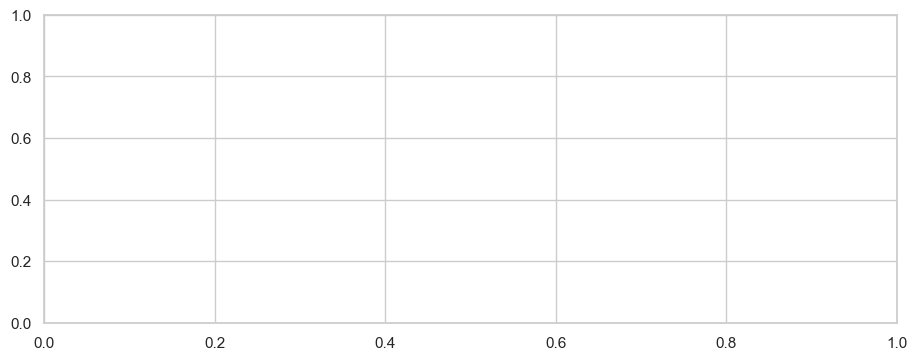

In [63]:
import numpy as np
import matplotlib.pyplot as plt

colorlist = np.array(
    ([(0.04, 0.015, 0.02, 1.0)] * 1 + [(0.8, 0.5, 0.2, 1.0)] * 1) * 16, dtype=object
)

fig, ax = plt.subplots()
y = np.ones(32)
x = np.linspace(1,32,32)
ax.bar(x, y, facecolor = colorlist)

In [68]:
def myfunc(i, n=6):
    return int(i / n % 2)

for i in range(48):
    print(i, myfunc(i, 6))

0 0
1 0
2 0
3 0
4 0
5 0
6 1
7 1
8 1
9 1
10 1
11 1
12 0
13 0
14 0
15 0
16 0
17 0
18 1
19 1
20 1
21 1
22 1
23 1
24 0
25 0
26 0
27 0
28 0
29 0
30 1
31 1
32 1
33 1
34 1
35 1
36 0
37 0
38 0
39 0
40 0
41 0
42 1
43 1
44 1
45 1
46 1
47 1
